# <div align='center'> <font color= 'red'>  BOLUM 9
## <div align='center'> <font color ='red'>    HIYERARSIK KUMELEME

Bu ödevde, UC Irvine Machine Learning Repository'den kalp hastalığı verisi ile çalışacaksınız.

Veri seti kümeleme algoritmasına geçmeden önce bazı işlemlere ihtiyaç duymaktadır.

##### Define the features and the outcome
  X = heartdisease_df.iloc[:, :13]
  y = heartdisease_df.iloc[:, 13]
##### Replace missing values (marked by ?) with a 0
  X = X.replace(to_replace='?', value=0)

##### Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
  y = np.where(y > 0, 0, 1)
Burada, X sizin değişkenleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, hastanın kalp hastası olduğu ve y 0'a eşit olduğunda, hastanın kalp hastalığı olmadığı sonucuna varıyoruz.

Ödevi tamamlamak için aşağıdaki soruların cevabını içeren Jupyter notebook'u sisteme yükleyiniz:

1- Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “mean”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?


2- n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın. Yukarıdaki üç bağlantı yöntemini deneyin ve her bir çözümünüz için ARI ve siluet skorları elde edin. Sonuçları birbirleriyle ve önceki bölümde uyguladığınız k-ortalama çözümü ile karşılaştırın. Hangi algoritma ve ayar daha iyi performans gösterir?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.cluster import KMeans

In [2]:
heart= pd.read_csv('data/heart.csv')

In [3]:
X = heart.drop('target', axis=1)
y = heart.target

Aslinda standardize islemi agac tabanli algoritmalarda gerekli degildir!!!!


In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## linkage='complete'

**Hiyerarşik kümeleme adındanda anlaşılacağı üzere bir kümeleme algoritmasıdır. Agglomerative ( Parçadan bütüne ) ve Divisive ( Bütünden parçaya ) olarak iki farklı varyasyonu vardır.**
* Agglomerative varyasyonunu anlatmaya çalışırsak ilk önce tüm veriler bir küme haline getirilir yani N tane eleman varsa N tane küme oluşur. Daha sonra birbirine mesafe olarak yakın olan kümeler birleşerek yeni bir küme oluşturur. Bu durum sistem kararlı oluncaya kadar devam eder. Divisive ise Agglomerative’ in tam tersidir. İlk başta tüm veriler tek bir küme oluşturulur. Daha sonra bu küme parçalanarak kümeleme işlemi yapılır.
   * Agglomerative ( Yığınsal ) hiyerarşik kümelemede mesafe hesaplamak için bir çok yol vardır. Dendrogram oluşturmada da kullanılırlar.
**Single Linkage :** İki küme arasındaki en yakın mesafeyi hesaplar.
**Complete Linkage:** İki küme arasındaki en uzak mesafeyi hesaplar.
**Average Linkage:** İki küme arasındaki ortalama mesafeyi hesaplar.
Bunların dışında **ward, weighted, centroid ve median yöntemleri** vardır. Seçilen yöntem sonucu etkiler.

In [5]:
# Yığınsal Kümelemenin Tanımlanması
agg_küme = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)
# linkage ve affinity = mesafe ölçüm yöntemleri
# linkage ve affinity parametrelerinin değiştirilmesi başarı oranını etkiler.

# Modeli Fit Etmek
kümeler = agg_küme.fit_predict(X_std)

In [6]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))


Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.2457417084730023
The silhoutte score of the Agglomerative Clustering solution: 0.13559986726838452


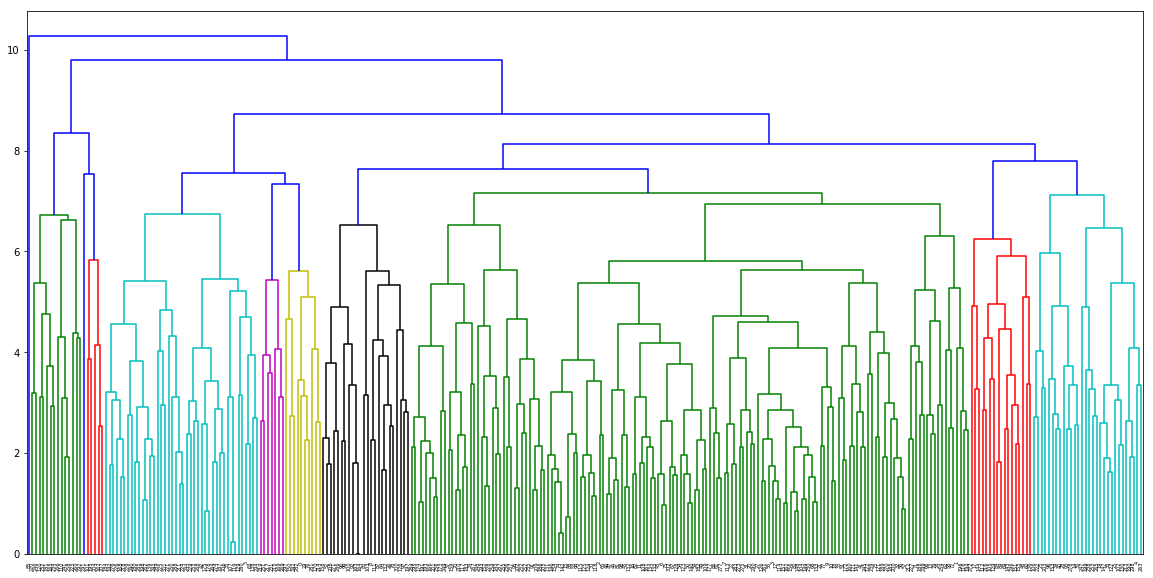

In [7]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [8]:
etiketler = KMeans(n_clusters=2, random_state=40).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.16823269494218376


In [9]:
tam_tahmin = KMeans(n_clusters=2, random_state=40).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin)

0.3867962148223543

## linkage='ward'

In [10]:
# Yığınsal Kümelemenin Tanımlanması
agg_küme = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean', ## ward ayari euclidean ile ancak calisiyor
                                      n_clusters=2)

# Modeli Fit Etmek
kümeler = agg_küme.fit_predict(X_std)

In [11]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))


Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: 0.2454680392170414
The silhoutte score of the Agglomerative Clustering solution: 0.1325316617259095


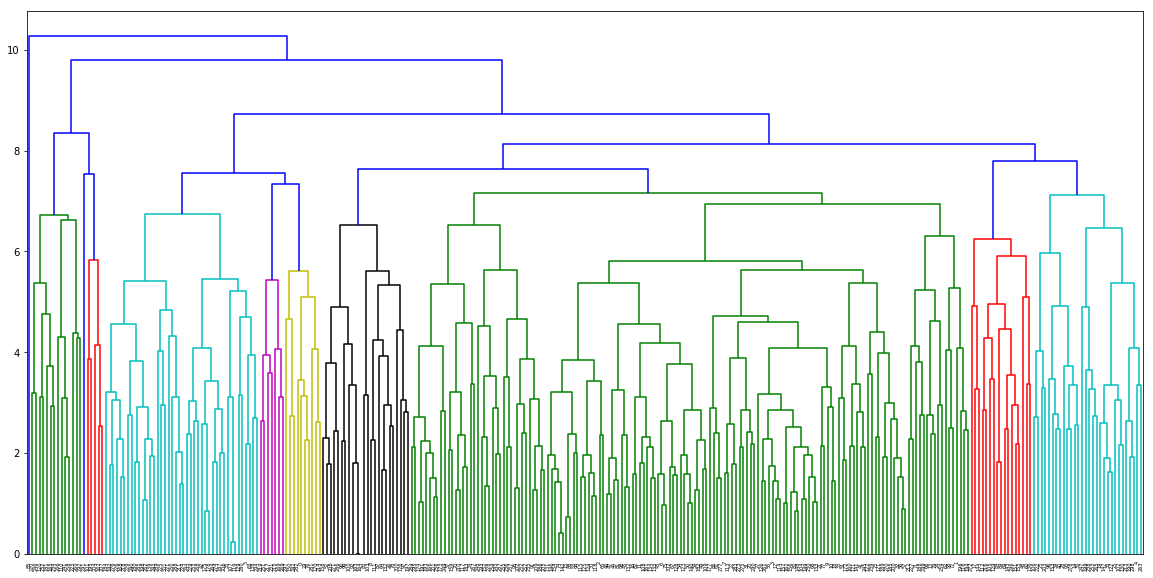

In [12]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [13]:
etiketler = KMeans(n_clusters=2, random_state=40).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.16823269494218376


In [14]:
tam_tahmin = KMeans(n_clusters=2, random_state=40).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin)

0.3867962148223543

## linkage='average'

In [15]:
# Yığınsal Kümelemenin Tanımlanması
agg_küme = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean', ## ward ayari euclidean ile ancak calisiyor
                                      n_clusters=2)

# Modeli Fit Etmek
kümeler = agg_küme.fit_predict(X_std)

In [16]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: {}"
      .format(metrics.adjusted_rand_score(y, kümeler)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))


Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi: -0.0010800413233203012
The silhoutte score of the Agglomerative Clustering solution: 0.3532620013624347


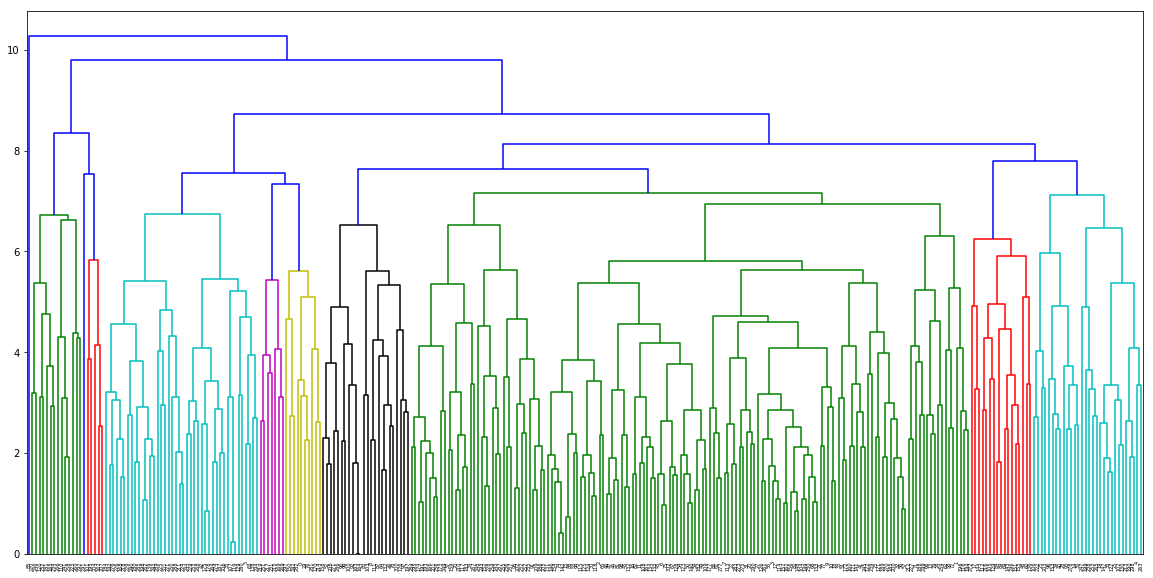

In [17]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [18]:
etiketler = KMeans(n_clusters=2, random_state=40).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.16823269494218376


In [19]:
tam_tahmin = KMeans(n_clusters=2, random_state=40).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin)

0.3867962148223543

Onceki bolumde gelen skorlar
silhouette_score    = 0.16823269494218376
adjusted_rand_score = 0.16922705914260142